In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
from sklearn.datasets import make_blobs

In [4]:
data = make_blobs( n_samples=100,n_features=3, centers=2, random_state=101)

In [5]:
type(data)

tuple

In [6]:
data

(array([[  0.99429187,   0.87511711,  -9.99909683],
        [  0.65761885,   0.91624771, -10.18458517],
        [ -6.48804352,   3.29034852,   6.73159871],
        [  0.5815206 ,   2.06249948,  -9.07157495],
        [ -7.42442678,   5.30835517,   6.86341624],
        [  2.26790487,   0.40816482, -10.17230518],
        [  1.62073713,  -0.05416228,  -9.92461083],
        [  2.41199108,   1.03683306,  -9.20017913],
        [ -7.62441747,   5.87096075,   5.41069708],
        [ -7.34160752,   3.671108  ,   7.36634568],
        [ -7.56358517,   3.5736335 ,   5.34284552],
        [  2.22972735,   1.6514787 ,  -7.43386319],
        [ -0.75249891,   2.31574949,  -9.26873428],
        [  0.54946324,   0.5581557 ,  -7.88852506],
        [ -0.4308995 ,   0.48011452,  -8.47545896],
        [ -1.19436032,   2.54705473,  -8.90232874],
        [ -0.06318407,   2.4416449 , -11.40312057],
        [ -6.70999871,   3.8246846 ,   7.34365184],
        [  1.32054601,   2.60559237, -10.47729501],
        [  0

In [7]:
from sklearn.preprocessing import MinMaxScaler

In [8]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[0])

In [9]:
data_x = scaled_data[:,0]
data_y = scaled_data[:,1]
data_z = scaled_data[:,2]

In [10]:
from mpl_toolkits.mplot3d import Axes3D

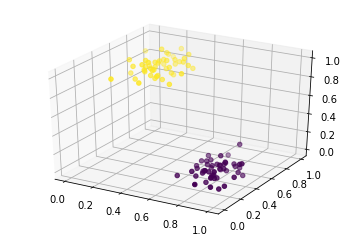

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(data_x,data_y,data_z,c=data[1])

In [12]:
import tensorflow as tf
from tensorflow.contrib.layers import fully_connected

In [13]:
num_inputs = 3
num_hidden = 2
num_outputs = num_inputs

In [14]:
learning_rate = 0.01

In [16]:
X = tf.placeholder(tf.float32,shape=[None,num_inputs])


In [17]:
hidden = fully_connected(X,num_hidden,activation_fn=None)
outputs = fully_connected(hidden,num_outputs,activation_fn=None)

In [18]:
loss = tf.reduce_mean(tf.square(outputs-X))

In [19]:
optimizer = tf.train.AdamOptimizer(learning_rate)
train = optimizer.minimize(loss)

In [20]:
init = tf.global_variables_initializer()

In [28]:
num_steps = 1000

with tf.Session() as sess:
    
    sess.run(init)
    
    for iteration in range(num_steps):
        sess.run(train,feed_dict={X:scaled_data})
        
    output_2d = hidden.eval(feed_dict={X:scaled_data}) 

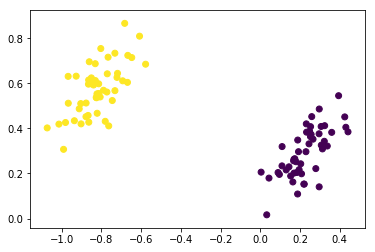

In [29]:
plt.scatter(output_2d[:,0],output_2d[:,1],c=data[1]) 

# RESTART KERNEL FROM HERE

## Stacked autoencoders 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import tensorflow as tf

In [3]:
from tensorflow.examples.tutorials.mnist import input_data

In [4]:
mnist = input_data.read_data_sets("../03-Convolutional-Neural-Networks/MNIST_data/",one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting ../03-Convolutional-Neural-Networks/MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting ../03-Convolutional-Neural-Networks/MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting ../03-Convolutional-Neural-Networks/MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting ../03-Convolutional-Neural-Networks/MNIST_data/t10k-labels-idx1-ubyte.gz


In [27]:
tf.reset_default_graph()

In [28]:
# 784
# 392
# 196
# 392
# 784

In [29]:
num_inputs = 784
neurons_hid1 = 392
neurons_hid2 = 196
neurons_hid3 = neurons_hid1
num_outputs = num_inputs

In [30]:
learning_rate = 0.01

In [31]:
act_func = tf.nn.relu

In [32]:
X = tf.placeholder(tf.float32,shape=[None,num_inputs])

with auto encoders it is usually a necessity to use the following initializer, to get the initizal weights according to the proportion of the layer sizes instead of random. 

In [33]:
initializer = tf.variance_scaling_initializer()

In [34]:
w1 = tf.Variable(initializer([num_inputs,neurons_hid1]),dtype=tf.float32)
w2 = tf.Variable(initializer([neurons_hid1,neurons_hid2]),dtype=tf.float32)
w3 = tf.Variable(initializer([neurons_hid2,neurons_hid3]),dtype=tf.float32)
w4 = tf.Variable(initializer([neurons_hid3,num_outputs]),dtype=tf.float32)

In [35]:
b1 = tf.Variable(tf.zeros(neurons_hid1))
b2 = tf.Variable(tf.zeros(neurons_hid2))
b3 = tf.Variable(tf.zeros(neurons_hid3))#
b4 = tf.Variable(tf.zeros(num_outputs))

In [36]:
hid_layer1 = act_func(tf.matmul(X,w1)+b1)
hid_layer2 = act_func(tf.matmul(hid_layer1,w2)+b2)
hid_layer3 = act_func(tf.matmul(hid_layer2,w3)+b3)
output_layer = act_func(tf.matmul(hid_layer3,w4)+b4)

In [37]:
loss = tf.reduce_mean(tf.square(output_layer - X))

In [38]:
optimizer = tf.train.AdamOptimizer(learning_rate)

In [39]:
train = optimizer.minimize(loss)

In [40]:
init = tf.global_variables_initializer()

In [41]:
saver = tf.train.Saver()

In [42]:
num_epochs = 5
batch_size = 150

with tf.Session() as sess:
    
    sess.run(init)
    
    for epoch in range(num_epochs):
        
        num_batches = mnist.train.num_examples // batch_size
        
        for iteration in range(num_batches):
            
            X_batch , y_batch = mnist.train.next_batch(batch_size)
            sess.run(train,feed_dict = {X:X_batch})
        
        training_loss = loss.eval(feed_dict={X:X_batch})
        
        print("EPOCH: {} LOSS: {}".format(epoch, training_loss))
        
    saver.save(sess,'./example_stacked_autoencoder.ckpt')

EPOCH: 0 LOSS: 0.0392114594578743
EPOCH: 1 LOSS: 0.03902155160903931
EPOCH: 2 LOSS: 0.03405150771141052
EPOCH: 3 LOSS: 0.035877641290426254
EPOCH: 4 LOSS: 0.03164590522646904


In [43]:
num_test_images = 10

with tf.Session() as sess:
    
    saver.restore(sess,'./example_stacked_autoencoder.ckpt')
    
    results = output_layer.eval(feed_dict={X:mnist.test.images[:num_test_images]})

INFO:tensorflow:Restoring parameters from ./example_stacked_autoencoder.ckpt


In [44]:
results

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

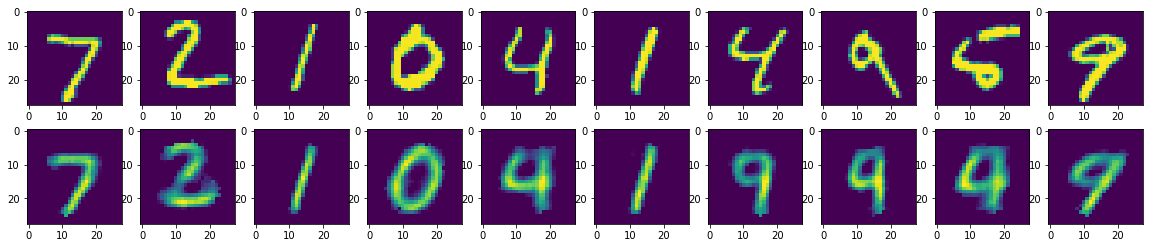

In [45]:
# Compare original images with their reconstructions
f, a = plt.subplots(2, 10, figsize=(20, 4))
for i in range(num_test_images):
    a[0][i].imshow(np.reshape(mnist.test.images[i], (28, 28)))
    a[1][i].imshow(np.reshape(results[i], (28, 28)))

In [71]:
num_test_images = 10

with tf.Session() as sess:
    
    saver.restore(sess,'./example_stacked_autoencoder.ckpt')
    
    results = hid_layer2.eval(feed_dict={X:mnist.test.images[:num_test_images]})

INFO:tensorflow:Restoring parameters from ./example_stacked_autoencoder.ckpt


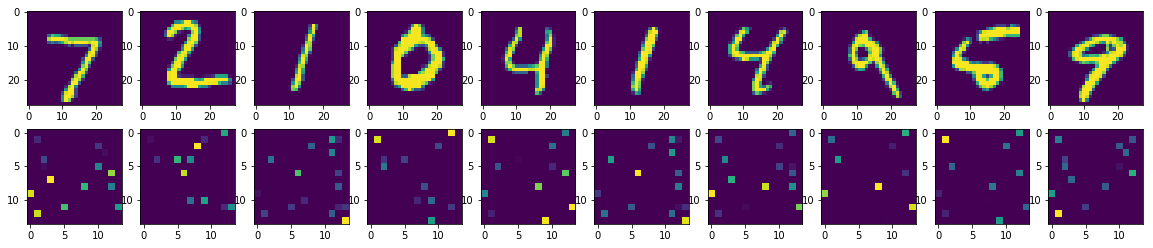

In [72]:
# Compare original images with their reconstructions
f, a = plt.subplots(2, 10, figsize=(20, 4))
for i in range(num_test_images):
    a[0][i].imshow(np.reshape(mnist.test.images[i], (28, 28)))
    a[1][i].imshow(np.reshape(results[i], (14, 14)))

In [65]:
np.sqrt(196)

14.0

In [64]:
results.shape

(10, 196)

In [61]:
784/2

392.0

In [68]:
392.0/14

28.0